<a href="https://colab.research.google.com/github/sahilmangal2004/Banking-Dashboard/blob/main/Banking_EDA_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_excel('/content/Banking.xlsx')
df.head(5)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1.485829e+06,6.036179e+05,607332.455240,12249.9584,1.134475e+06,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,6.414828e+05,2.295214e+05,344635.157402,61162.3089,2.000526e+06,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1.033402e+06,6.526747e+05,203054.348179,79071.7794,5.481376e+05,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1.048157e+06,1.048157e+06,234685.019326,57513.6520,1.148402e+06,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,4.877825e+05,4.466442e+05,128351.452320,30012.1360,1.674412e+06,0,3,1,2,5


In [19]:
df.shape

(3000, 25)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Client ID                 3000 non-null   object        
 1   Name                      3000 non-null   object        
 2   Age                       3000 non-null   int64         
 3   Location ID               3000 non-null   int64         
 4   Joined Bank               3000 non-null   datetime64[ns]
 5   Banking Contact           3000 non-null   object        
 6   Nationality               3000 non-null   object        
 7   Occupation                3000 non-null   object        
 8   Fee Structure             3000 non-null   object        
 9   Loyalty Classification    3000 non-null   object        
 10  Estimated Income          3000 non-null   float64       
 11  Superannuation Savings    3000 non-null   float64       
 12  Amount of Credit Car

In [21]:
#generating statistics for the dataframe
df.describe()

,Age,Location ID,Joined Bank,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,2010-08-15 00:03:21.600000,171305.034094,25531.599673,1.463667,3176.206780,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529774,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
min,17.000000,12.000000,1995-01-03 00:00:00,15919.475400,1482.030000,1.000000,1.174800,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,44.998400,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,2004-04-01 18:00:00,82906.594300,12513.775000,1.000000,1236.633525,2.396281e+05,2.044004e+05,1.199475e+05,7.479441e+04,11916.546400,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,2011-02-18 00:00:00,142313.479600,22357.355000,1.000000,2560.800750,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.187200,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,2017-12-24 06:00:00,242290.306650,35464.740000,2.000000,4522.633050,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.390700,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,2021-12-31 00:00:00,522330.259200,75963.900000,3.000000,13991.994000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.866000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000
std,19.854760,12462.273017,NaN,111935.808260,16259.950770,0.676387,2497.094724,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924007,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242


In [22]:
bins  = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

Text(0.5, 1.0, 'Income Band Distribution')

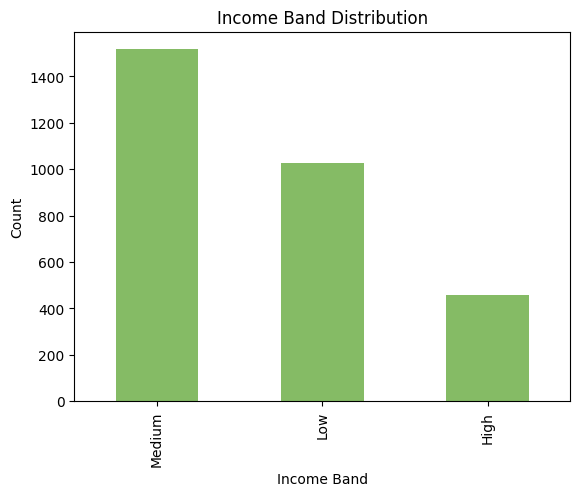

In [23]:
df['Income Band'].value_counts().plot(kind='bar', color='#85BB65')
plt.xlabel('Income Band')
plt.ylabel('Count')
plt.title('Income Band Distribution')

Value Counts for BRId:
Axes(0.125,0.11;0.775x0.77)
Value Counts for GenderId:
Axes(0.125,0.11;0.775x0.77)
Value Counts for IAId:
Axes(0.125,0.11;0.775x0.77)
Value Counts for Amount of Credit Cards:
Axes(0.125,0.11;0.775x0.77)
Value Counts for Nationality:
Axes(0.125,0.11;0.775x0.77)
Value Counts for Occupation:
Axes(0.125,0.11;0.775x0.77)
Value Counts for Fee Structure:
Axes(0.125,0.11;0.775x0.77)
Value Counts for Loyalty Classification:
Axes(0.125,0.11;0.775x0.77)
Value Counts for Properties Owned:
Axes(0.125,0.11;0.775x0.77)
Value Counts for Risk Weighting:
Axes(0.125,0.11;0.775x0.77)
Value Counts for Income Band:
Axes(0.125,0.11;0.775x0.77)


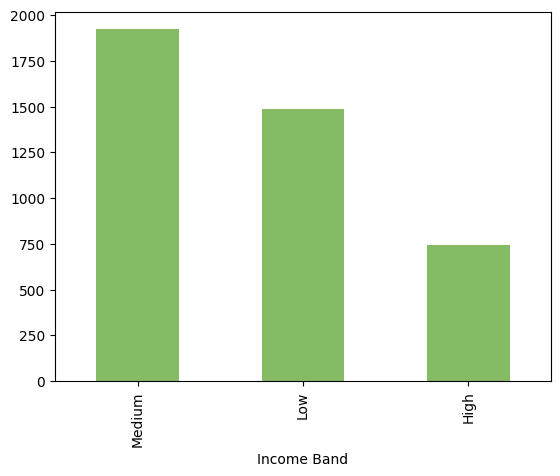

In [24]:
categorical_cols = ['BRId', 'GenderId', 'IAId', 'Amount of Credit Cards',
                    'Nationality', 'Occupation', 'Fee Structure',
                    'Loyalty Classification', 'Properties Owned',
                    'Risk Weighting', 'Income Band']

for col in categorical_cols:
    print(f"Value Counts for {col}:")
    print(df[col].value_counts().plot(kind='bar', color='#85BB65'))


## Univerate Analysis


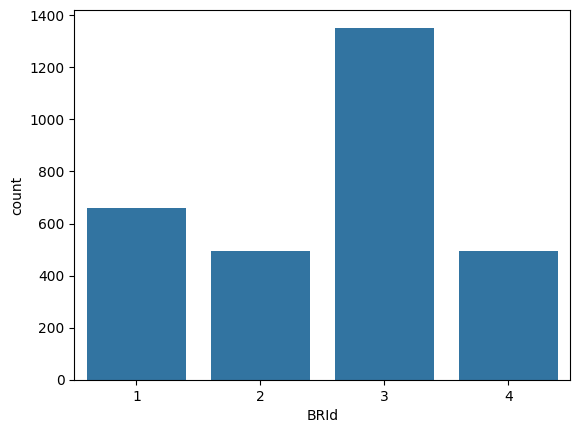

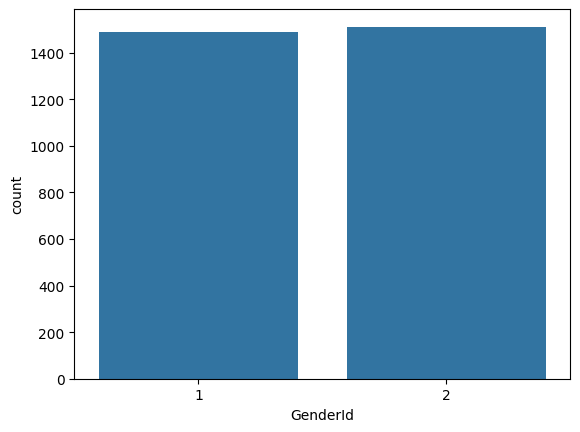

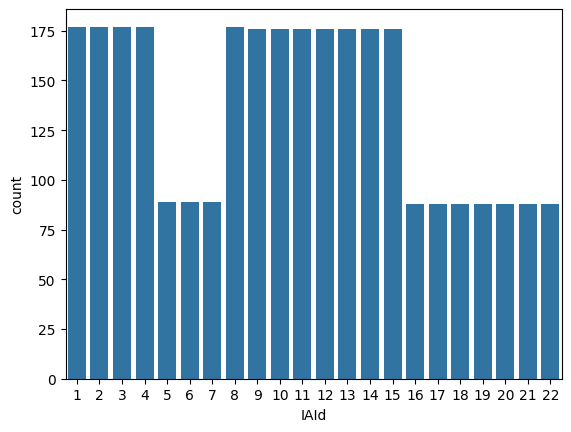

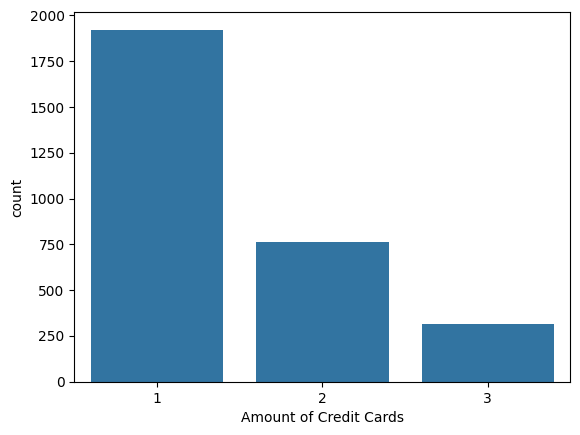

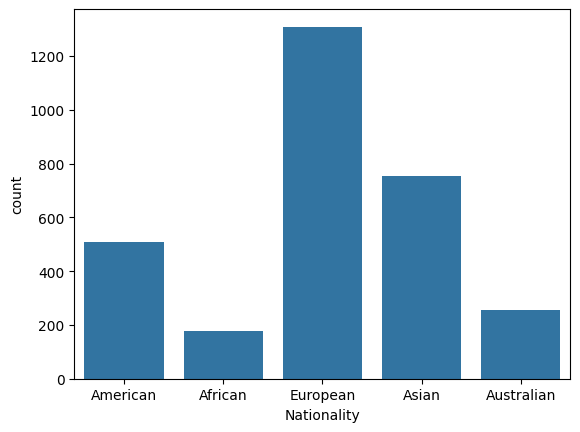

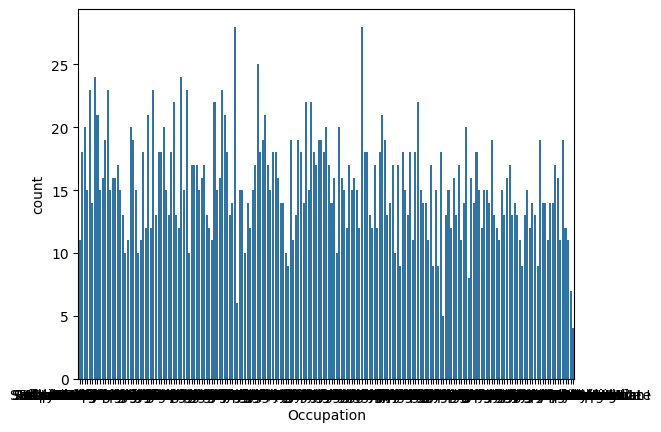

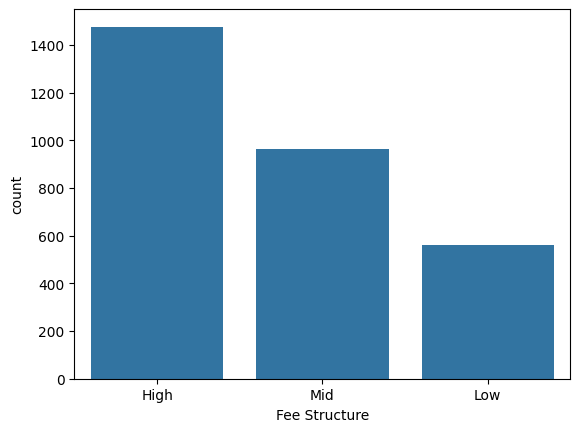

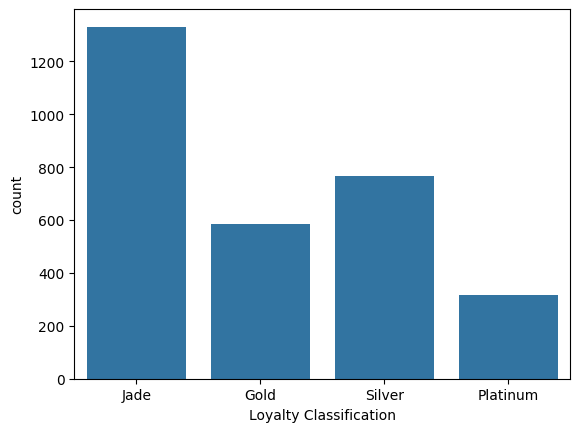

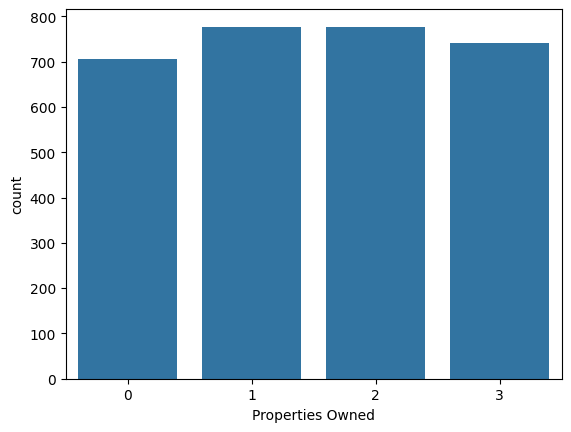

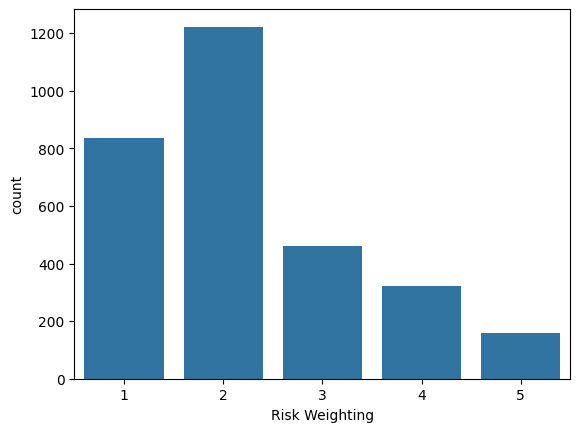

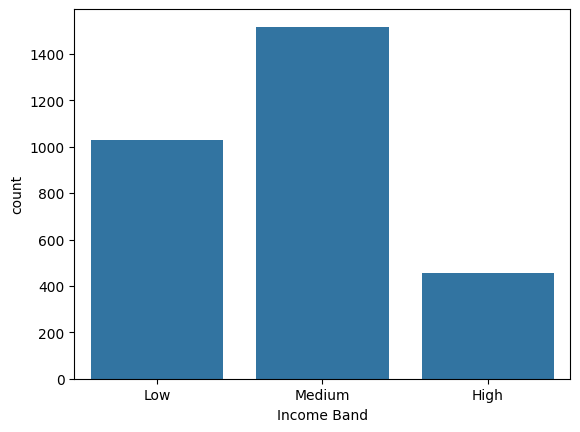

In [25]:
for i, predictor in enumerate(['BRId', 'GenderId', 'IAId', 'Amount of Credit Cards',
                    'Nationality', 'Occupation', 'Fee Structure',
                    'Loyalty Classification', 'Properties Owned',
                    'Risk Weighting', 'Income Band']):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

## Biverate Analysis


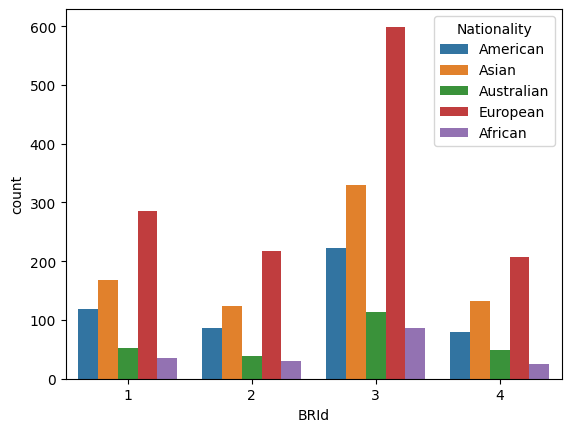

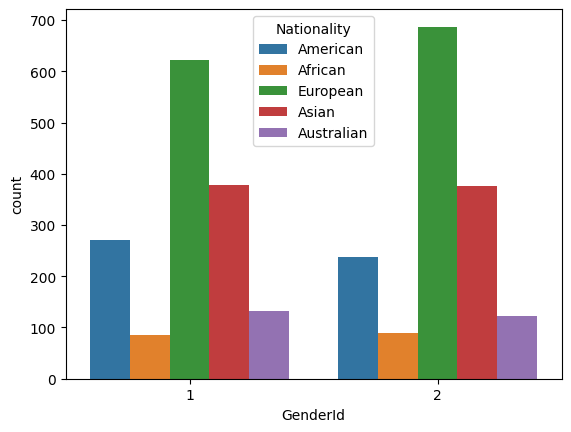

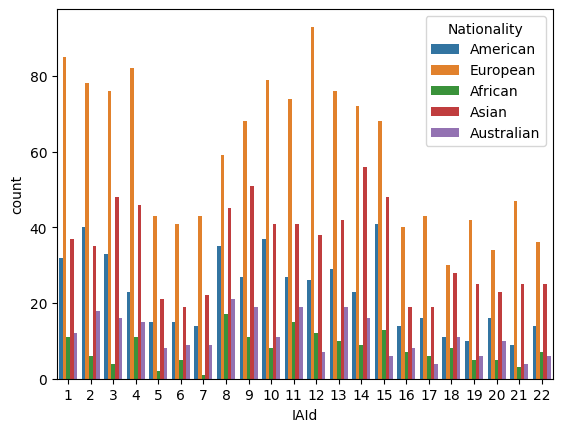

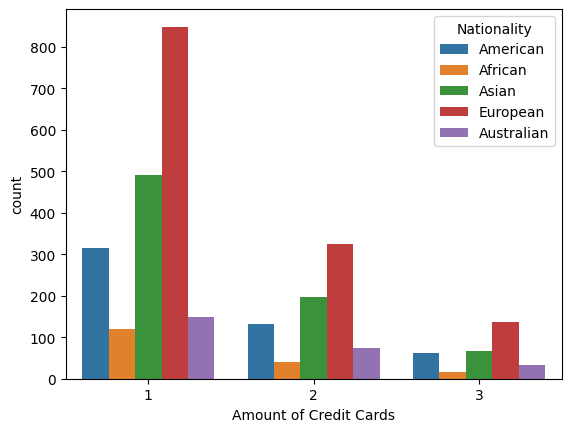

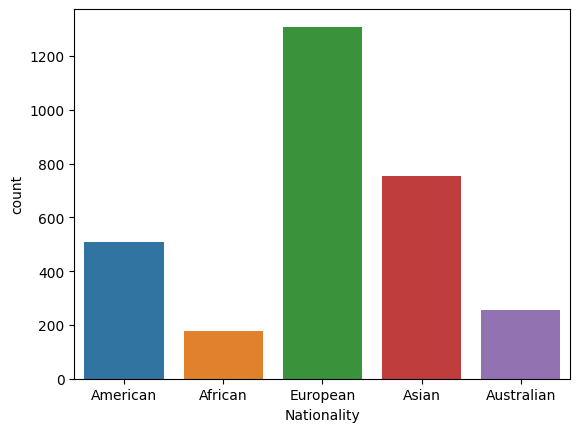

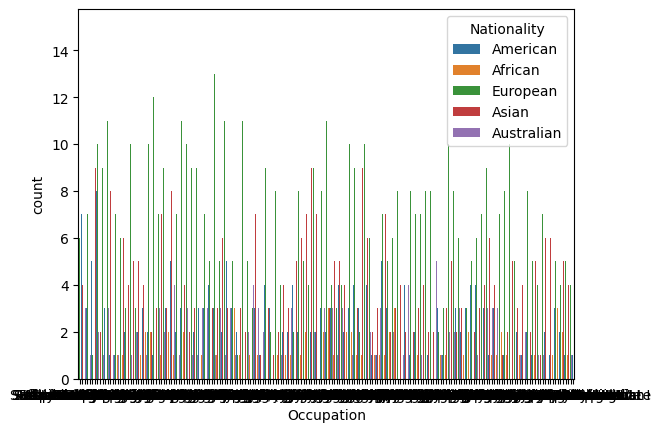

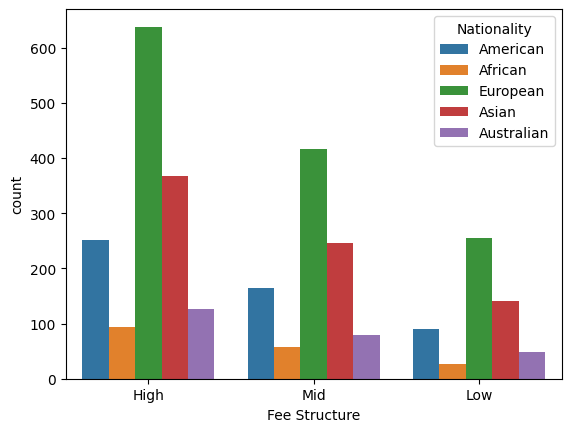

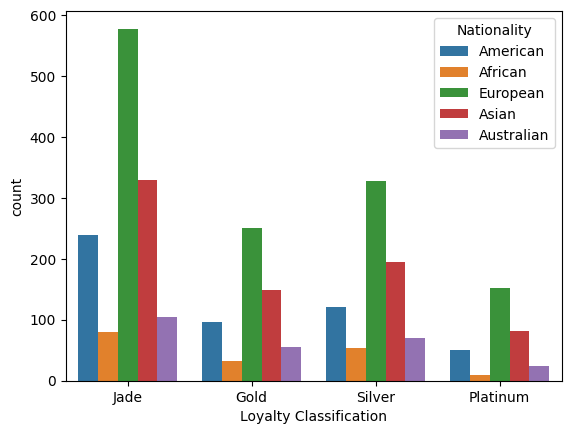

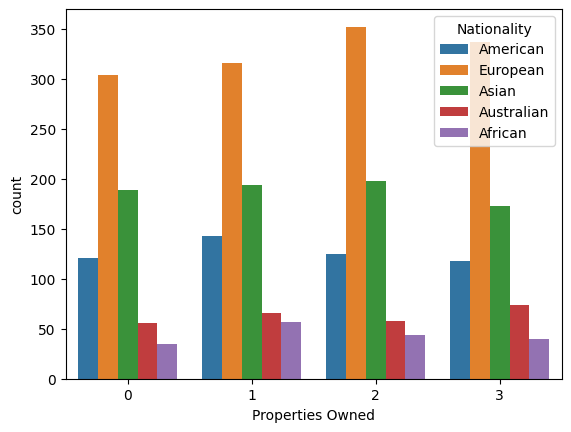

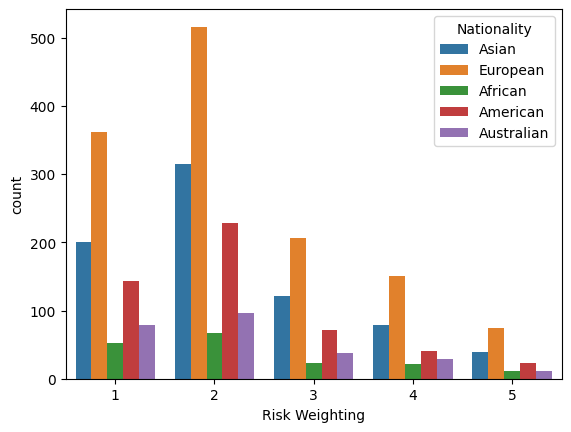

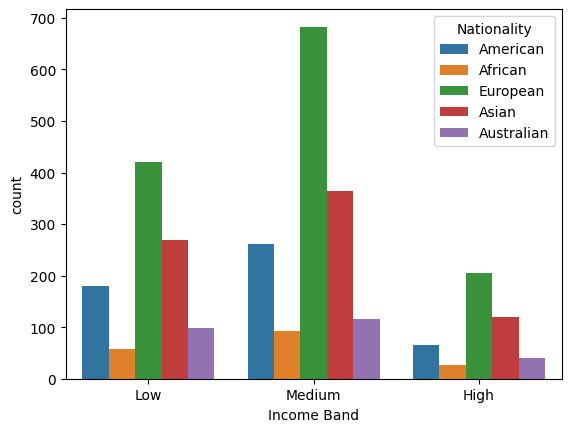

In [26]:
for i, predictor in enumerate(['BRId', 'GenderId', 'IAId', 'Amount of Credit Cards',
                    'Nationality', 'Occupation', 'Fee Structure',
                    'Loyalty Classification', 'Properties Owned',
                    'Risk Weighting', 'Income Band']):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

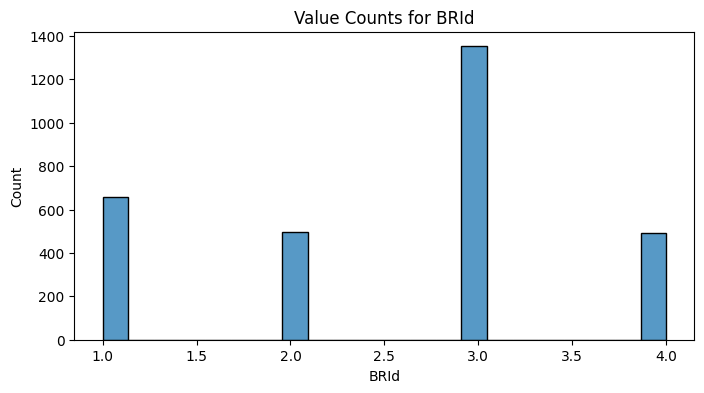

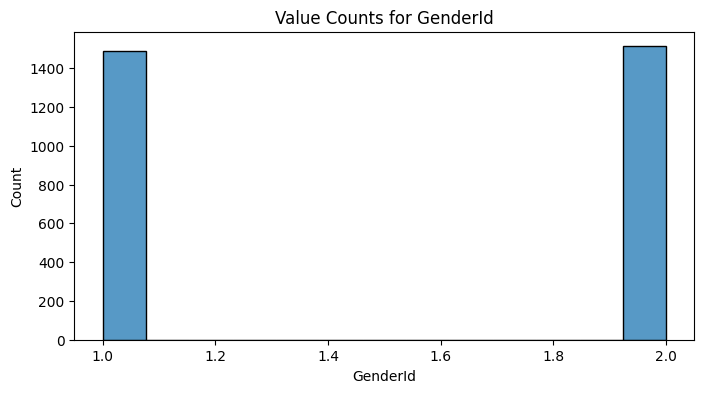

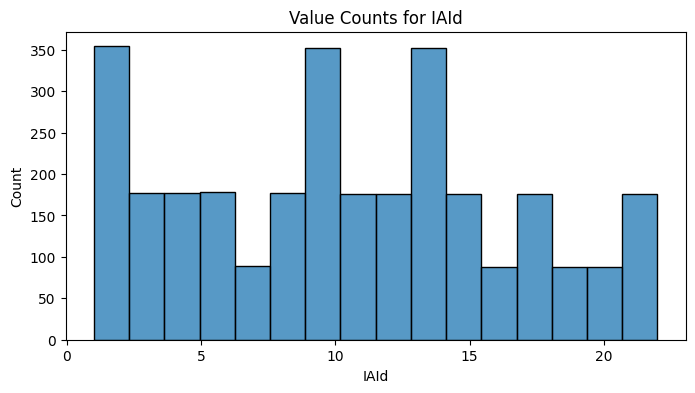

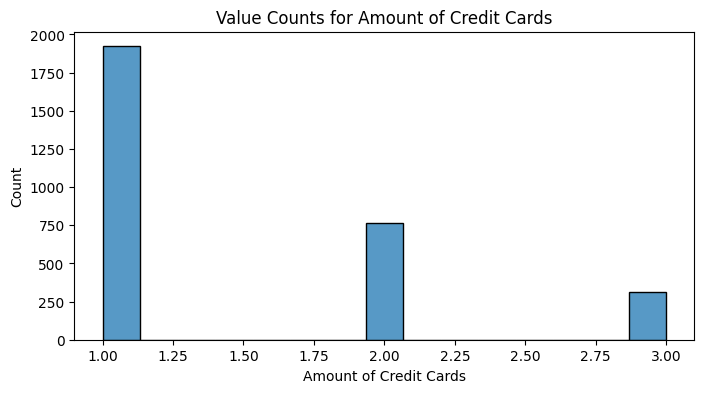

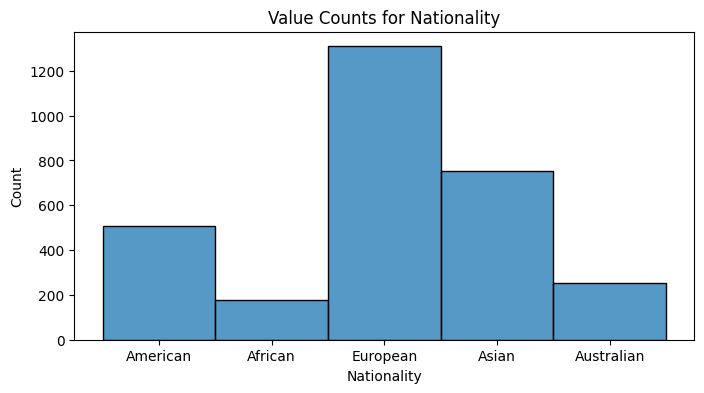

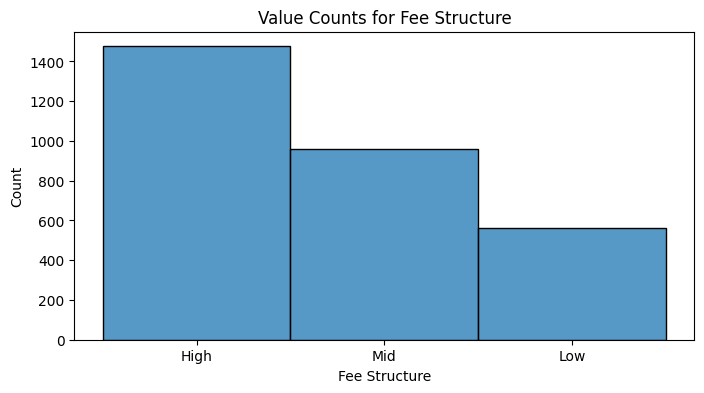

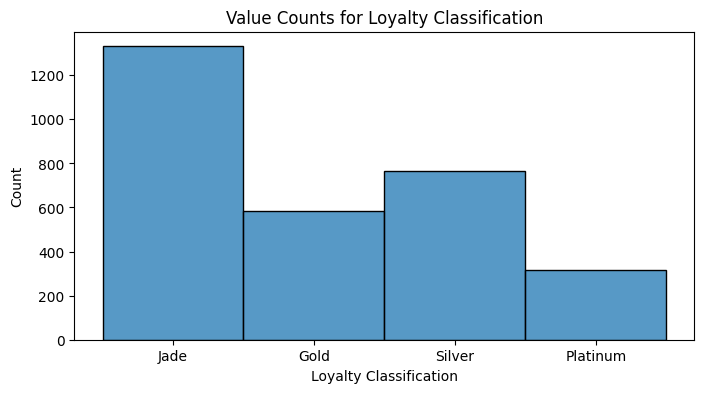

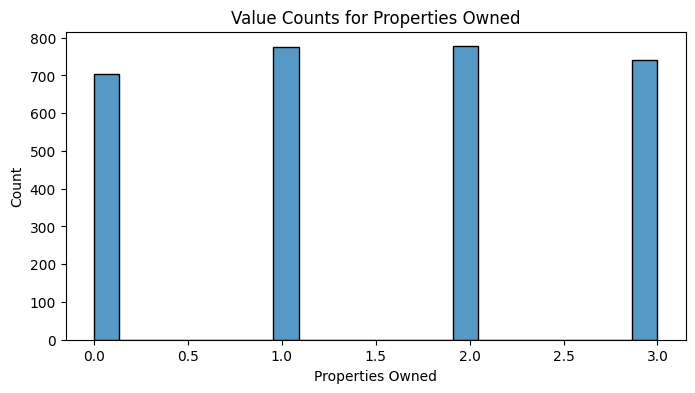

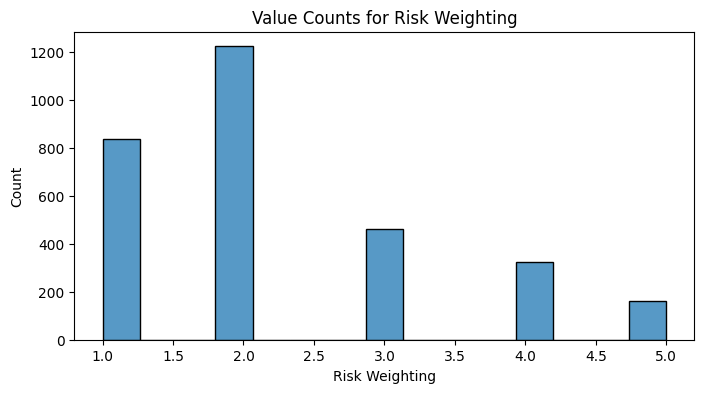

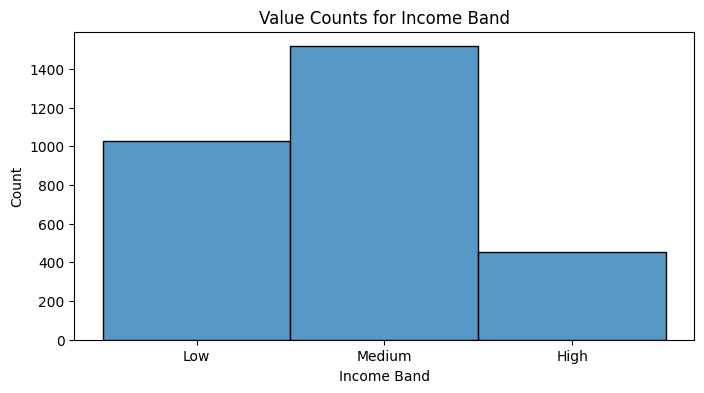

In [27]:
# histplot of value counts for different occupation

for col in categorical_cols:
  if col == 'Occupation':
    continue
  plt.figure(figsize=(8, 4))
  sns.histplot(df[col])
  plt.title(f'Value Counts for {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

##Numerical analysis

In [28]:
df.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band'],
      dtype='object')

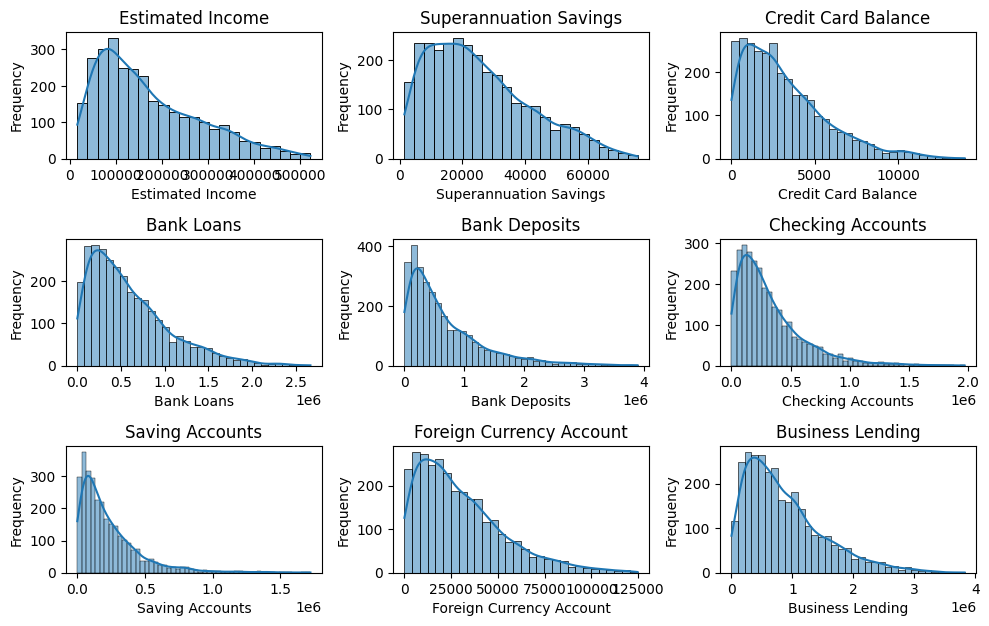

In [29]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending']

plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##HeatMaps

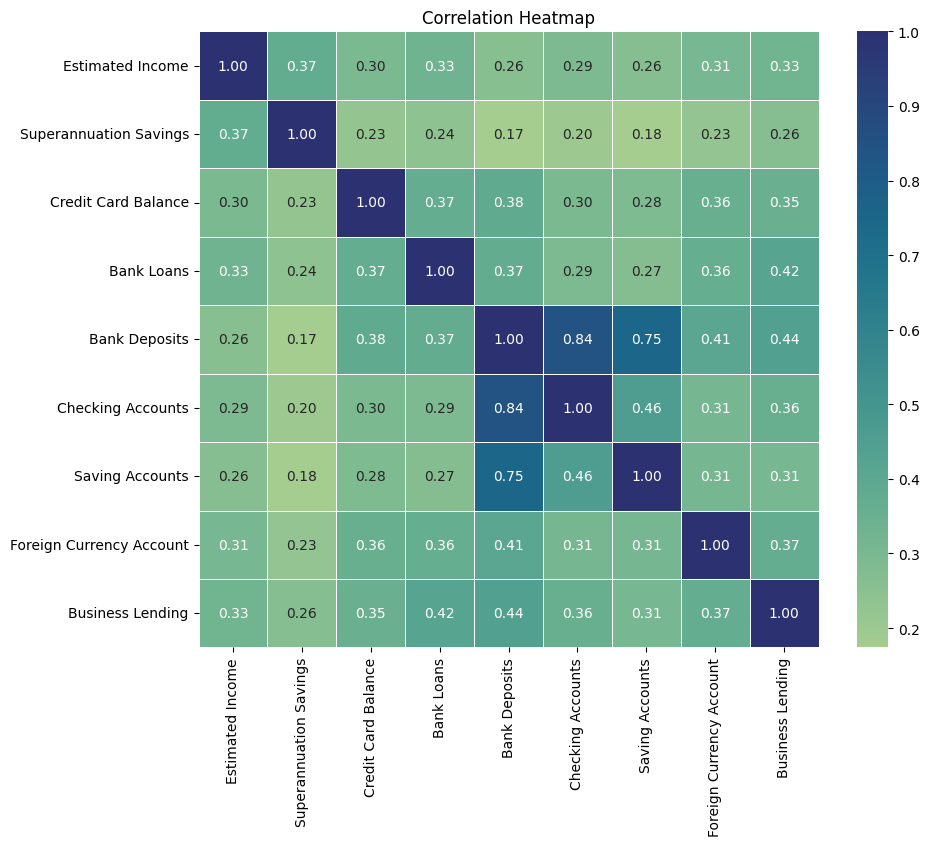

In [30]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##**📊 Top Insights**

🔹 **1. Strongest Positive Correlations**

**Bank Deposits ↔ Checking Accounts (0.84):**

Customers with higher bank deposits are very likely to have high checking account balances. This suggests linked account behaviors and possible bundling of financial services.

**Bank Deposits ↔ Saving Accounts (0.75):**

Savings accounts correlate strongly with deposits, implying that saving behavior drives overall deposits.

**🔹 2. Moderate Relationships**

**Business Lending ↔ Bank Loans (0.42):**

Indicates that customers with bank loans are somewhat more likely to engage in business lending, suggesting possible SME or entrepreneurial customer clusters.

**Estimated Income ↔ Superannuation Savings (0.37):**

Higher income individuals are likely contributing more toward superannuation, which aligns with expected financial behavior.

**Credit Card Balance ↔ Bank Deposits (0.38):**

Some relationship exists between deposit levels and credit card usage—possibly reflecting creditworthy or cash-rich profiles.

**🔹 3. Surprising Observations**

**Estimated Income has weak correlations with all features (max ~0.37):**

Suggests income alone doesn't strongly determine product usage—other behavioral or demographic factors may be more predictive.

**Foreign Currency Account shows mild correlation across the board:**

It’s moderately related to bank loans, credit card balances, and business lending, hinting at an international or business-savvy user segment.